<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/feature_scaling_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import keras
#from sklearn.datasets import make_circles
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [70]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [71]:
df=df.iloc[:,2 :]
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [74]:
X=df.iloc[:,0:2]
X.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

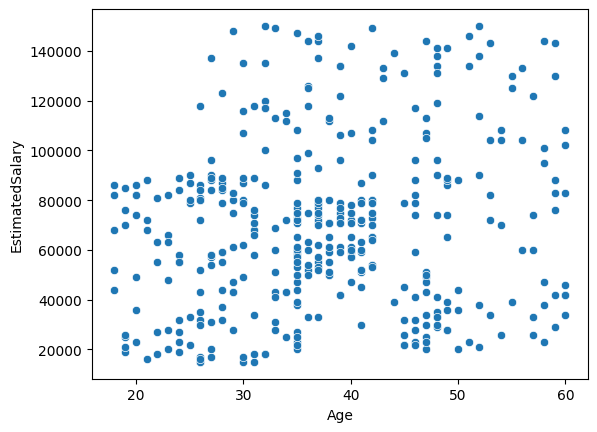

In [92]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [75]:
y=df.iloc[:,-1]
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

In [77]:
X_train,X_test,y_train,y_test=train_test_split (X,y ,test_size=0.4,random_state=42)

In [78]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [79]:
model.compile( optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [81]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 71.4301 - accuracy: 0.5625 - val_loss: 47.2270 - val_accuracy: 0.6250
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 51.6720 - accuracy: 0.5625 - val_loss: 50.8118 - val_accuracy: 0.3750
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 58.1273 - accuracy: 0.4333 - val_loss: 40.7515 - val_accuracy: 0.6250
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 43.1056 - accuracy: 0.5208 - val_loss: 45.7142 - val_accuracy: 0.3750
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 47.6296 - accuracy: 0.5125 - val_loss: 34.5985 - val_accuracy: 0.3750
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 23.5878 - accuracy: 0.4958 - val_loss: 72.1217 - val_accuracy: 0.3750
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 60.2963 - accuracy: 0.5250 - val_loss: 82.3832 - val_accuracy: 0.3750
Epoch 8/100

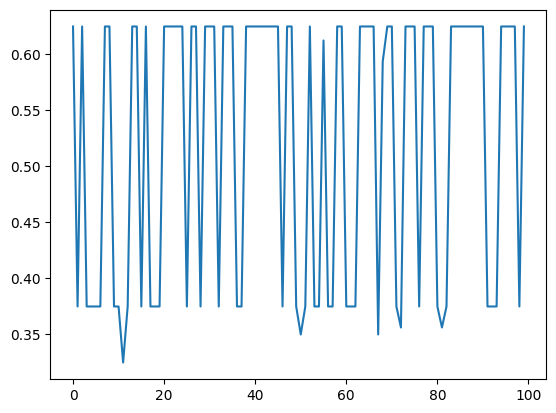

In [88]:
plt.plot(history.history['val_accuracy'])
#because our model scale is diffrent thats why val_accuracy ossilates like this.

In [ ]:
#we need to normalized the features.feature scaling

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(X_train)
x_test_scale=scaler.fit_transform(X_test)

<Axes: >

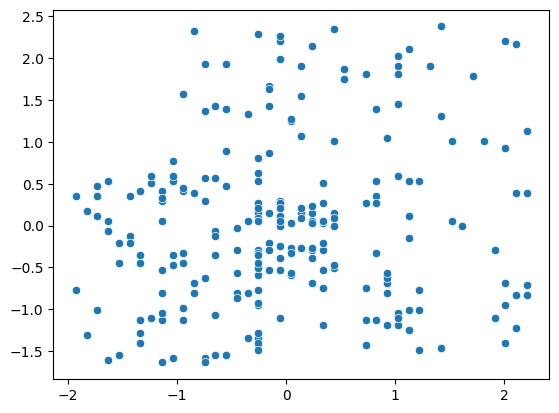

In [99]:
sns.scatterplot(x=x_train_scale[:,0],y=x_train_scale[:,1])

In [96]:
model=Sequential()
model.add(Dense( 256,activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [97]:
model.compile( optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
history=model.fit(x_train_scale,y_train,epochs=100,validation_data=(x_test_scale,y_test))

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 0.2523 - accuracy: 0.9083 - val_loss: 0.2165 - val_accuracy: 0.9375
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2517 - accuracy: 0.9125 - val_loss: 0.2151 - val_accuracy: 0.9375
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2513 - accuracy: 0.9125 - val_loss: 0.2145 - val_accuracy: 0.9375
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2517 - accuracy: 0.9125 - val_loss: 0.2147 - val_accuracy: 0.9375
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.2509 - accuracy: 0.9125 - val_loss: 0.2149 - val_accuracy: 0.9375
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2512 - accuracy: 0.9125 - val_loss: 0.2160 - val_accuracy: 0.9312
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2509 - accuracy: 0.9167 - val_loss: 0.2161 - val_accuracy: 0.9375
Epoch 8/100
8/8 [=======

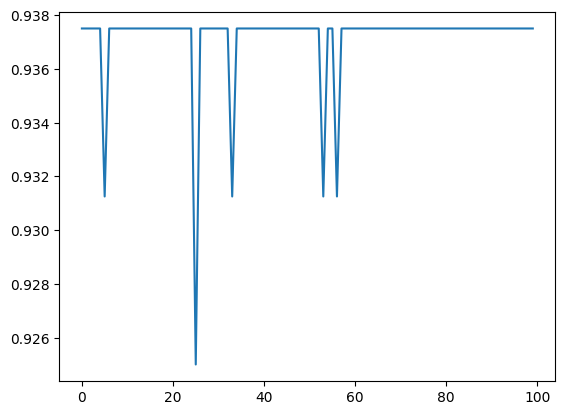

In [102]:
plt.plot(history.history['val_accuracy'])